In [3]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/6289/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
#df=pd.read_csv("TSLA.csv")
df=pd.read_csv(abspath_curr + 'TSLA.csv',header=0)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [5]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#origin
##lag1

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0653
Epoch 2/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0148
Epoch 3/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0141
Epoch 4/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0133
Epoch 5/100
24/24 [==============================] - 3s 140ms/step - loss: 0.0133
Epoch 6/100
24/24 [==============================] - 4s 151ms/step - loss: 0.0126
Epoch 7/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0119
Epoch 8/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0111
Epoch 9/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0114
Epoch 10/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0101
Epoch 11/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0102
Epoch 12/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0098
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

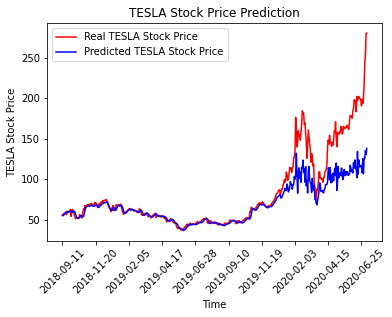

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

##lag7

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 81ms/step - loss: 0.2576
Epoch 2/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0397
Epoch 3/100
4/4 [==============================] - 0s 84ms/step - loss: 0.0306
Epoch 4/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0333
Epoch 5/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0257
Epoch 6/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0258
Epoch 7/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0134
Epoch 8/100
4/4 [==============================] - 0s 87ms/step - loss: 0.0156
Epoch 9/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0112
Epoch 10/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0139
Epoch 11/100
4/4 [==============================] - 0s 87ms/step - loss: 0.0117
Epoch 12/100
4/4 [==============================] - 0s 87ms/step - loss: 0.0143
Epoch 13/100
4/4 [==============================]

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

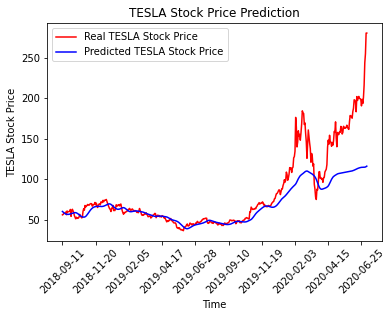

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

##lag14

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 54ms/step - loss: 0.3041
Epoch 2/100
2/2 [==============================] - 0s 55ms/step - loss: 0.1635
Epoch 3/100
2/2 [==============================] - 0s 55ms/step - loss: 0.0363
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0714
Epoch 5/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0231
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0262
Epoch 7/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0367
Epoch 8/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0293
Epoch 9/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0219
Epoch 10/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0202
Epoch 11/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0222
Epoch 12/100
2/2 [==============================] - 0s 62ms/step - loss: 0.0158
Epoch 13/100
2/2 [==============================]

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

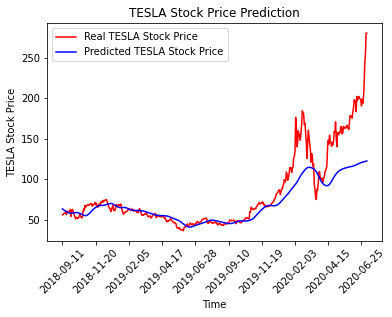

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

#6 layers

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0666
Epoch 2/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0211
Epoch 3/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0193
Epoch 4/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0161
Epoch 5/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0156
Epoch 6/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0135
Epoch 7/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0144
Epoch 8/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0147
Epoch 9/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0135
Epoch 10/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0139
Epoch 11/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0163
Epoch 12/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0125
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

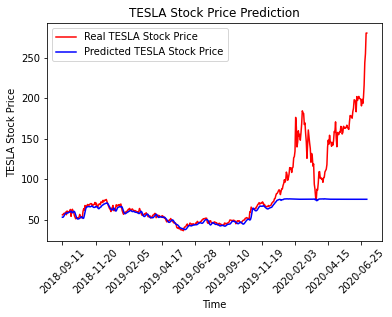

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

#dropout rate=0.5

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0954
Epoch 2/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0264
Epoch 3/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0219
Epoch 4/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0203
Epoch 5/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0209
Epoch 6/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0209
Epoch 7/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0213
Epoch 8/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0192
Epoch 9/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0180
Epoch 10/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0163
Epoch 11/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0164
Epoch 12/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0148
Epoch 13/100
24/24 [=====

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

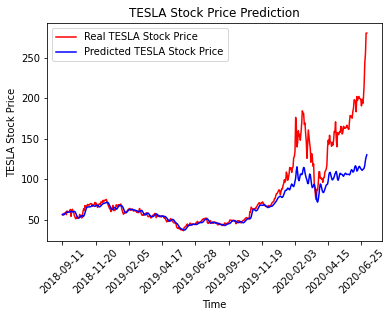

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

#stochastic mode
##batch size=1

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 1)

Epoch 1/100
740/740 [==============================] - 38s 51ms/step - loss: 0.0338
Epoch 2/100
740/740 [==============================] - 37s 50ms/step - loss: 0.0187
Epoch 3/100
740/740 [==============================] - 36s 49ms/step - loss: 0.0145
Epoch 4/100
740/740 [==============================] - 38s 52ms/step - loss: 0.0124
Epoch 5/100
740/740 [==============================] - 38s 51ms/step - loss: 0.0093
Epoch 6/100
740/740 [==============================] - 37s 50ms/step - loss: 0.0103
Epoch 7/100
740/740 [==============================] - 37s 51ms/step - loss: 0.0079
Epoch 8/100
740/740 [==============================] - 38s 51ms/step - loss: 0.0078
Epoch 9/100
740/740 [==============================] - 38s 51ms/step - loss: 0.0074
Epoch 10/100
740/740 [==============================] - 38s 51ms/step - loss: 0.0082
Epoch 11/100
740/740 [==============================] - 38s 51ms/step - loss: 0.0077
Epoch 12/100
740/740 [==============================] - 38s 51ms/step - lo

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

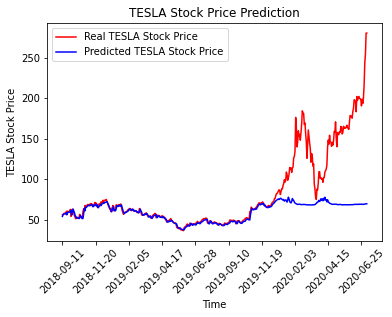

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

#Prediction


In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)


In [7]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0626
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0175
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0119
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0117
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0115
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0114
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0107
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0119
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0109
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0108
Epoch 12/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0097
Epoch 13/100
24/24 [=====

In [8]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [10]:
import copy
predicted_days=14
X_test2=copy.deepcopy(X_test)
for i in range(predicted_days):
    X_temp=np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]=X_test2[-1][j+1][0]
    X_temp[0][59][0]=model.predict(X_test2[-1:])[0][0]
    X_test2=np.vstack([X_test2,X_temp])
predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

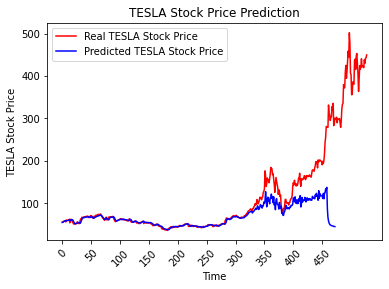

In [11]:
# Visualising the results
plt.plot(dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()